In [1]:
#Importing necessery libraries

import numpy as np 
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
#Importing data
df = pd.read_csv("UScomments.csv", on_bad_lines='skip')

C:\Users\ishap\AppData\Local\Temp\ipykernel_8064\3244411558.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("UScomments.csv", on_bad_lines='skip')


In [3]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
df.shape

(691400, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [6]:
#Change datatypes of likes and replies to integer
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['replies'] = pd.to_numeric(df['replies'], errors='coerce')

In [7]:
#number of null values
df.isnull().sum()

video_id         0
comment_text    26
likes            1
replies          1
dtype: int64

In [8]:
#handling null values
df.dropna(inplace= True)

In [9]:
df.shape

(691373, 4)

In [10]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [11]:
df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4.0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3.0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3.0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3.0,0.0
4,XpVt6Z1Gjjo,trending 😉,3.0,0.0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1.0,0.0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0.0,0.0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0.0,0.0
691398,EoejGgUNmVU,Islığı yeter...,0.0,0.0


In [12]:
#Converting comments to lower case
df['comment_text'] = df['comment_text'].astype(str).str.lower()

In [13]:
#Removing punctuation, numbers, special characters
df['comment_text'] = df['comment_text'].str.replace("[^a-z#]", '')
df['comment_text'] = df['comment_text'].str.replace('[^\w\s]+', '')

In [14]:
#Tokenizing text in the comments
df['tokens'] = df['comment_text'].apply(lambda x: x.split())
df.head()

,video_id,comment_text,likes,replies,tokens
0,XpVt6Z1Gjjo,logan paul it's yo big day ‼️‼️‼️,4.0,0.0,"[logan, paul, it's, yo, big, day, ‼️‼️‼️]"
1,XpVt6Z1Gjjo,i've been following you from the start of your...,3.0,0.0,"[i've, been, following, you, from, the, start,..."
2,XpVt6Z1Gjjo,say hi to kong and maverick for me,3.0,0.0,"[say, hi, to, kong, and, maverick, for, me]"
3,XpVt6Z1Gjjo,my fan . attendance,3.0,0.0,"[my, fan, ., attendance]"
4,XpVt6Z1Gjjo,trending 😉,3.0,0.0,"[trending, 😉]"


In [15]:
#Lemmetization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [17]:
#removing stopwords
import swifter  

df['tokens'] = df['tokens'].swifter.apply(lambda x: [wnl.lemmatize(word) for word in x if word not in stop_words])


Pandas Apply:   0%|          | 0/691373 [00:00<?, ?it/s]

In [40]:
#Keeping only long words
import string
translator = str.maketrans('', '', string.punctuation)
def only_long_words(words):
    results = [word.translate(translator) for word in words if len(word) > 3 ]
    return results

df['comment_words'] = df['tokens'].apply(only_long_words)

In [42]:
df['text_string'] = df['comment_words'].apply(lambda x: ' '.join(x))

In [43]:
df

,video_id,comment_text,likes,replies,tokens,comment_words,text_string
0,XpVt6Z1Gjjo,logan paul it's yo big day ‼️‼️‼️,4.0,0.0,"[logan, paul, yo, big, day, ‼️‼️‼️]","[logan, paul, ‼️‼️‼️]",logan paul ‼️‼️‼️
1,XpVt6Z1Gjjo,i've been following you from the start of your...,3.0,0.0,"[i've, following, start, vine, channel, seen, ...","[ive, following, start, vine, channel, seen, v...",ive following start vine channel seen vlogs
2,XpVt6Z1Gjjo,say hi to kong and maverick for me,3.0,0.0,"[say, hi, kong, maverick]","[kong, maverick]",kong maverick
3,XpVt6Z1Gjjo,my fan . attendance,3.0,0.0,"[fan, ., attendance]",[attendance],attendance
4,XpVt6Z1Gjjo,trending 😉,3.0,0.0,"[trending, 😉]",[trending],trending
...,...,...,...,...,...,...,...
691395,EoejGgUNmVU,лучшая,1.0,0.0,[лучшая],[лучшая],лучшая
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à roan...,0.0,0.0,"[qu'est, ce, que, j'aimerais, que, tu, vienne,...","[quest, jaimerais, vienne, roanne]",quest jaimerais vienne roanne
691397,EoejGgUNmVU,ven a mexico! 😍 te amo lp,0.0,0.0,"[ven, mexico!, 😍, te, amo, lp]",[mexico],mexico
691398,EoejGgUNmVU,islığı yeter...,0.0,0.0,"[islığı, yeter...]","[islığı, yeter]",islığı yeter


In [44]:
all_words = ' '.join([word for word in df['text_string']])

In [45]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [46]:
#Count of words in the text
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'like': 67549, 'love': 61615, 'video': 45323, 'make': 30097, 'look': 29801, 'people': 29419, 'would': 26859, 'good': 25907, 'know': 24684, '’': 23718, ...})

In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ishap\AppData\Roaming\nltk_data...


True

In [48]:
#Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [49]:
df['Sentiment Scores'] = df['text_string'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [50]:
df.head()

,video_id,comment_text,likes,replies,tokens,comment_words,text_string,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul it's yo big day ‼️‼️‼️,4.0,0.0,"[logan, paul, yo, big, day, ‼️‼️‼️]","[logan, paul, ‼️‼️‼️]",logan paul ‼️‼️‼️,0.0
1,XpVt6Z1Gjjo,i've been following you from the start of your...,3.0,0.0,"[i've, following, start, vine, channel, seen, ...","[ive, following, start, vine, channel, seen, v...",ive following start vine channel seen vlogs,0.0
2,XpVt6Z1Gjjo,say hi to kong and maverick for me,3.0,0.0,"[say, hi, kong, maverick]","[kong, maverick]",kong maverick,0.0
3,XpVt6Z1Gjjo,my fan . attendance,3.0,0.0,"[fan, ., attendance]",[attendance],attendance,0.0
4,XpVt6Z1Gjjo,trending 😉,3.0,0.0,"[trending, 😉]",[trending],trending,0.0


In [52]:
df['Sentiment Scores'].describe()

count    691373.000000
mean          0.158156
std           0.427241
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.510600
max           1.000000
Name: Sentiment Scores, dtype: float64

In [53]:
df['Sentiment'] = df['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [57]:
sentiment = df['Sentiment'].value_counts()

Let's plot Sentiment Scores

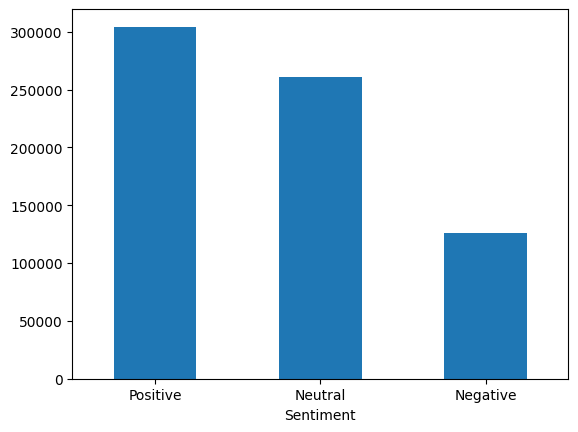

In [63]:
sentiment.plot.bar(rot = 0)

plt.show(block=True)

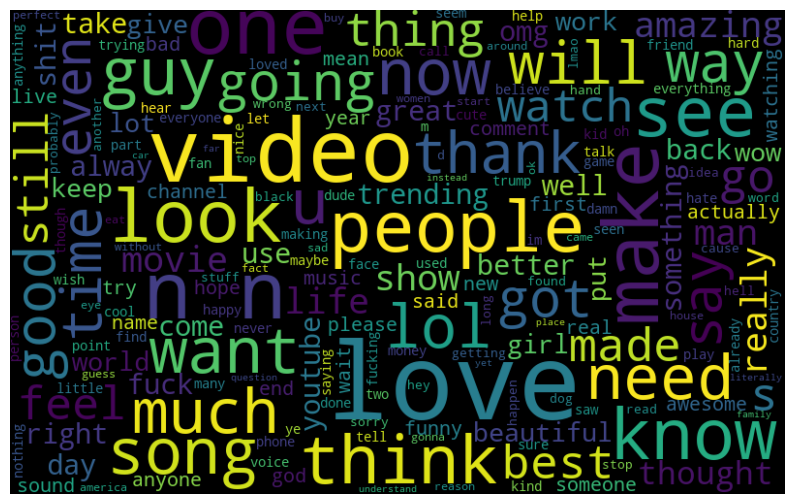

In [66]:
all_words = ' '.join([text for text in df['comment_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

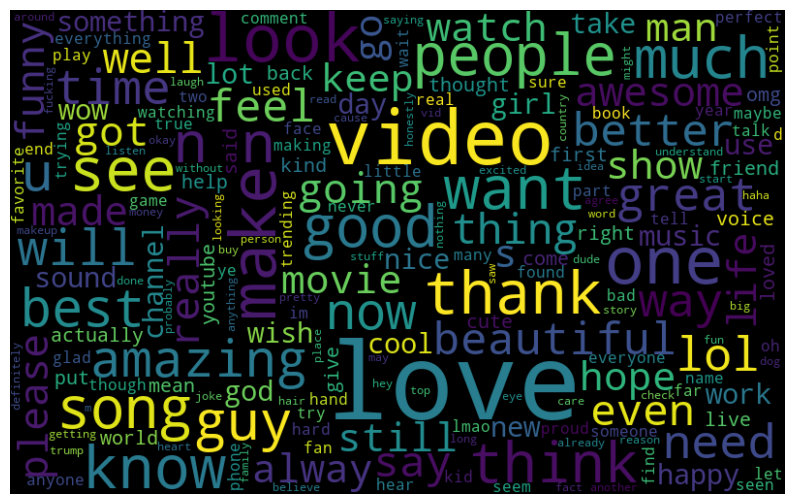

In [67]:
all_words_posi = ' '.join([text for text in df['comment_text'][df.Sentiment == 'Positive']])
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

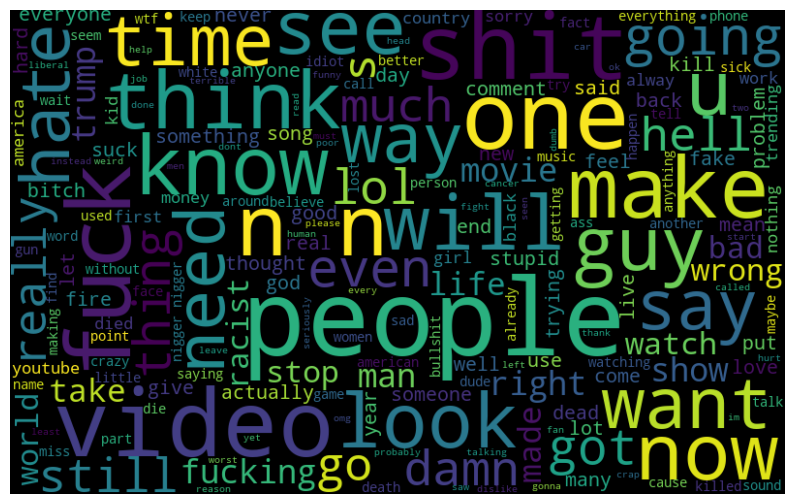

In [68]:
all_words_nega = ' '.join([text for text in df['comment_text'][df.Sentiment == 'Negative']])
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

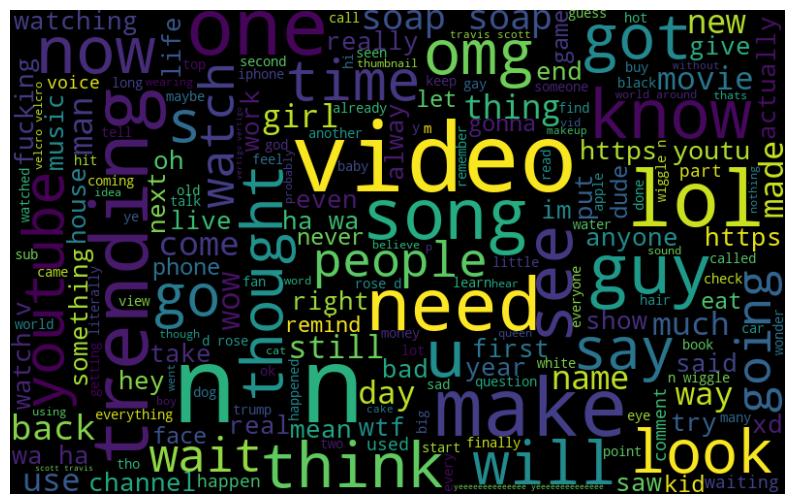

In [69]:
all_words_neu = ' '.join([text for text in df['comment_text'][df.Sentiment == 'Neutral']])
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()